In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
from linearmodels import PanelOLS, RandomEffects, PooledOLS

# Task 1 - Binary Regression

In [2]:
df = pd.read_excel("telco.xls")
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,equipmon,cardmon,wiremon,multline,voice,internet,callid,callwait,forward,confer
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,...,0.00,7.50,0.0,No,No,No,No,No,Yes,No
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,...,0.00,15.25,35.7,No,Yes,No,Yes,Yes,Yes,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,...,0.00,30.25,0.0,No,No,No,Yes,Yes,No,Yes
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,...,0.00,0.00,0.0,No,No,No,No,No,No,No
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,...,0.00,0.00,0.0,No,No,No,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10,39,Unmarried,0,27,Some college,0,No,Female,...,29.05,0.00,0.0,No,No,No,No,No,No,No
996,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,...,25.60,0.00,0.0,No,No,No,No,No,No,No
997,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,...,54.55,35.75,65.8,Yes,Yes,Yes,Yes,Yes,Yes,Yes
998,Zone 3,70,49,Unmarried,18,87,High school degree,22,No,Female,...,0.00,25.25,0.0,No,Yes,No,Yes,Yes,Yes,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   object 
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   object 
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   object 
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   object 
 9   gender    1000 non-null   object 
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   object 
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   object 
 14  wireless  1000 non-null   object 
 15  longmon   1000 non-null   float64
 16  tollmon   1000 non-null   float64
 17  equipmon  1000 non-null   float64
 18  cardmon   1000 non-null   float64
 19  wiremon   1000 non-null   float64
 20  multline  1000 non-null   objec

### Variables chosen:

Dependent: 
- equip

Predictors:
- region
- tenure
- retire
- age
- gender
- employ
- income
- reside

In [8]:
df.equip.replace(('Yes','No'),(1,0),inplace=True) # check

In [14]:
df['region'] = df['region'].astype('category')
df['retire'] = df['retire'].astype('category')
df['gender'] = df['gender'].astype('category')

In [13]:
df.gender.value_counts()

Female    517
Male      483
Name: gender, dtype: int64

In [15]:
numerical = ['tenure','age','employ','income','reside']
categorical = ['region','retire','gender']

## Descriptive analysis

### Numerical variable description

##### Hypothesis:

H1: The distribution of the variable 'equip' is different from the normal distribution

H0: The distribution of the variable 'equip' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

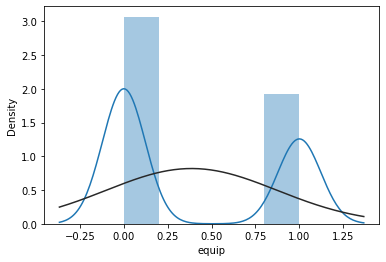

In [18]:
sns.distplot(df['equip'], fit=stats.norm)

In [19]:
stats.kstest(df['equip'], 'norm', args=(df['equip'].mean(), df['equip'].std()))

KstestResult(statistic=0.3999616496476243, pvalue=7.089998081815526e-145)

##### Conclusion:

The dependent variable 'equip' deviates from the normal distribution (H1 is accepted at p-value = 0.05).

##### Hypothesis:

- H1_1: The distribution of the variable 'tenure' is different from the normal distribution
- H1_2: The distribution of the variable 'age' is different from the normal distribution
- H1_3: The distribution of the variable 'employ' is different from the normal distribution
- H1_4: The distribution of the variable 'income' is different from the normal distribution
- H1_5: The distribution of the variable 'reside' is different from the normal distribution

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.07834997682857742, pvalue=8.713077299797405e-06)

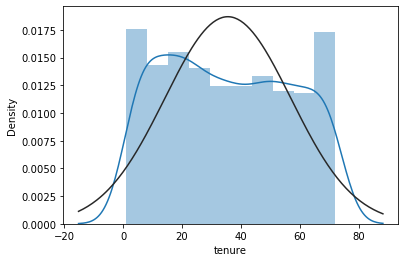

In [24]:
sns.distplot(df['tenure'], fit=stats.norm)
stats.kstest(df['tenure'], 'norm', args=(df['tenure'].mean(), df['tenure'].std()))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.06971171605722815, pvalue=0.00011378516567708046)

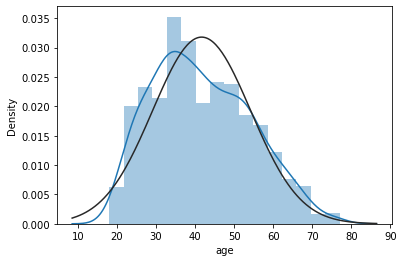

In [25]:
sns.distplot(df['age'], fit=stats.norm)
stats.kstest(df['age'], 'norm', args=(df['age'].mean(), df['age'].std()))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.13791064520770807, pvalue=4.721089703813389e-17)

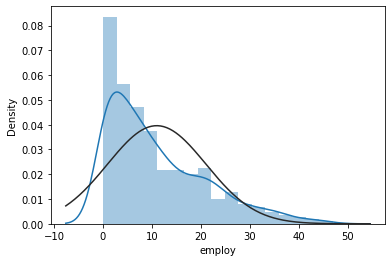

In [26]:
sns.distplot(df['employ'], fit=stats.norm)
stats.kstest(df['employ'], 'norm', args=(df['employ'].mean(), df['employ'].std()))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.2610051212239811, pvalue=1.3680449792418739e-60)

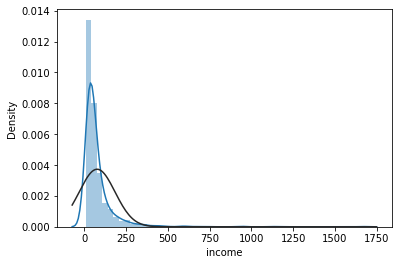

In [27]:
sns.distplot(df['income'], fit=stats.norm)
stats.kstest(df['income'], 'norm', args=(df['income'].mean(), df['income'].std()))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.23816184178605054, pvalue=2.1592959111670204e-50)

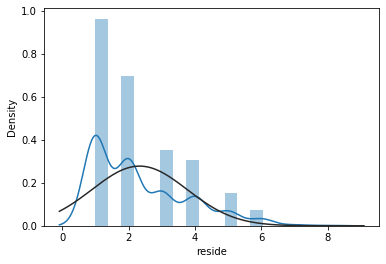

In [28]:
sns.distplot(df['reside'], fit=stats.norm)
stats.kstest(df['reside'], 'norm', args=(df['reside'].mean(), df['reside'].std()))

##### Conclusion:

All predictor variables deviate from the normal distribution (H1_1, H1_2, H1_3, H1_4 and H1_5 are accepted at p-value = 0.05).

#### Correlation

Since most variables are not normally distributed, Spearman correlation can be used:

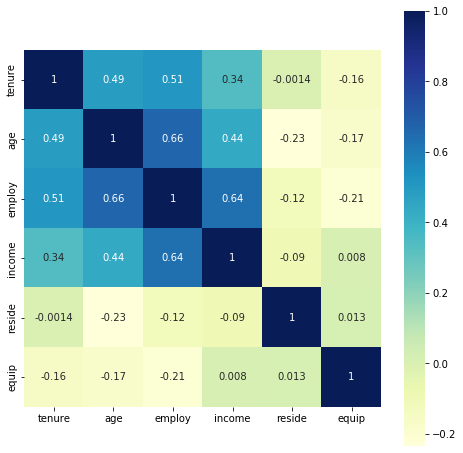

In [29]:
cor = df[['tenure','age','employ','income','reside','equip']].corr('spearman')
plt.figure(figsize=(8, 8))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

It is seen that variables are not strongle correlated: the highest correlation is between employ and age (0.66), and a high correlation is also between imcome and employ (0.64). The correlation between predictors and the dependent variable is very small

### Categorical variable description

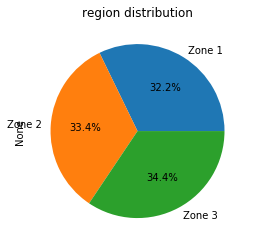

In [31]:
df.groupby('region').size().plot(kind='pie', title = 'region distribution',autopct='%1.1f%%')

Regions are almost equally distributed.

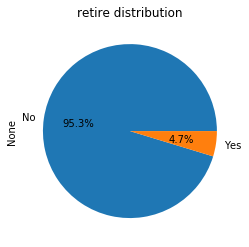

In [32]:
df.groupby('retire').size().plot(kind='pie', title = 'retire distribution',autopct='%1.1f%%')

Retired people are not sufficiently represented in the dataset (less than 5%)

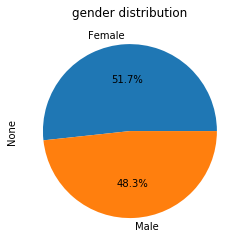

In [33]:
df.groupby('gender').size().plot(kind='pie', title = 'gender distribution',autopct='%1.1f%%')

Genders are almost equally distributed

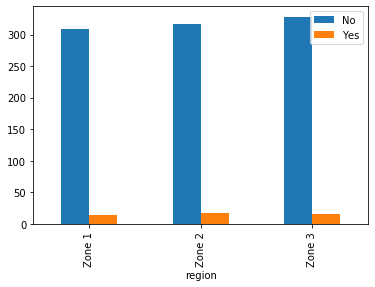

In [34]:
df.groupby('region')['retire'].value_counts().unstack().plot(kind='bar')

Distribution of retired people among zones is almost the same

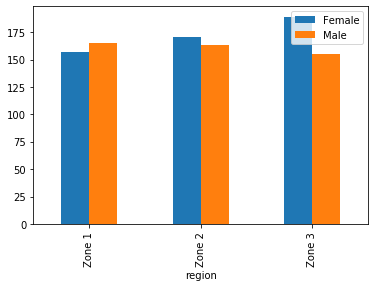

In [35]:
df.groupby('region')['gender'].value_counts().unstack().plot(kind='bar')

Distribution of genders among zones is nearly the same: in Zone 1 there are slightly more males than females, while in Zones 2,3 there are slightly more females than males.

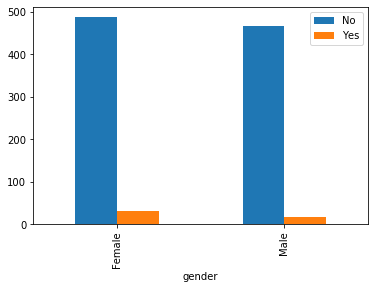

In [36]:
df.groupby('gender')['retire'].value_counts().unstack().plot(kind='bar')

There are significantly more retired females than retired males in the dataset.

### Comparing predictors with the dependent var

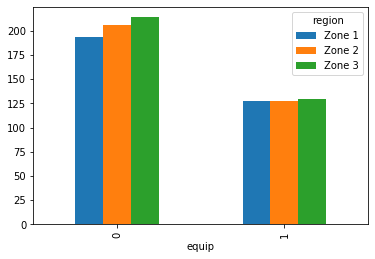

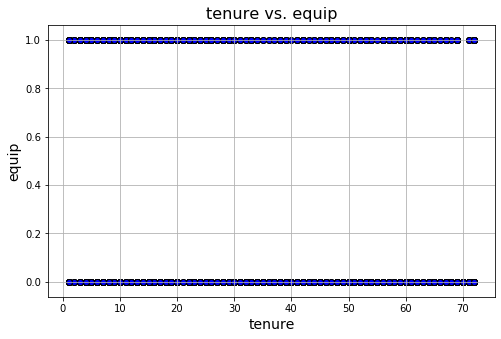

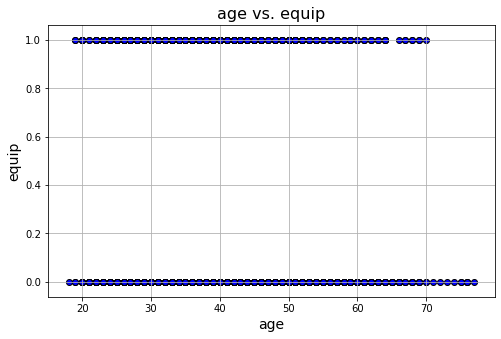

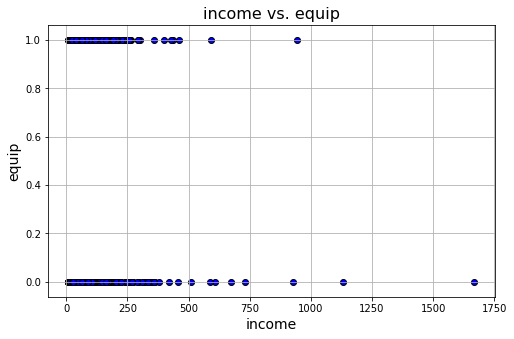

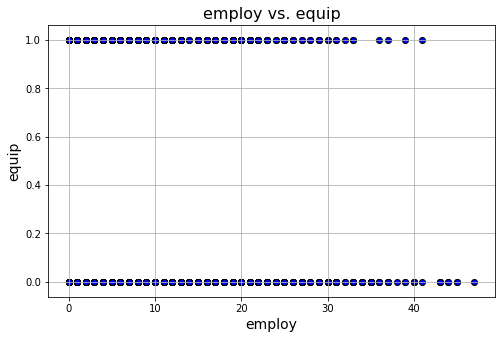

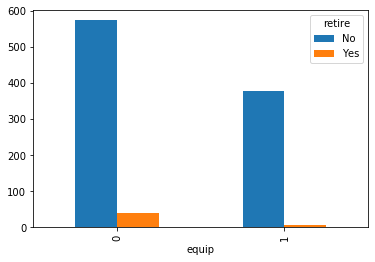

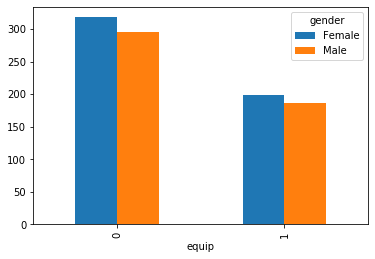

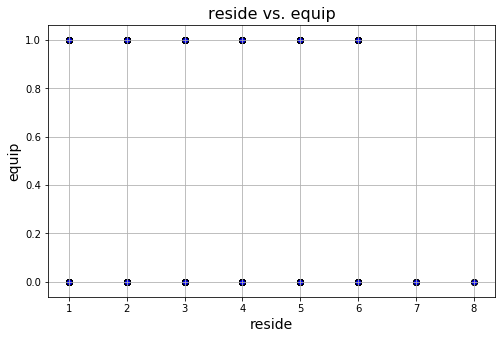

In [20]:
for c in df.columns[0:]:
    if c in numerical:
        plt.figure(figsize=(8,5))
        plt.title('{} vs. equip'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df.equip, color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('equip', fontsize=14)
        plt.show()
    elif c in categorical:
        ct = pd.crosstab(df.equip, df[c])
        ct.plot.bar()

#### Conclusion:

- Distribution of regions for equip = 1 and equip = 0 is almost the same.
- Distribution of tenure for equip = 1 and equip = 0 is almost the same.
- As for age, for all people with age > 70, equip = 0, < 70 - can be both.
- As for income, with income > 500 there is a greater chance that equip = 0.
- As for employ, with employ > 35 years there is a greater chance that equip = 0.
- If a person is retired, a significantly greater chance that equip = 0.
- Distribution of gender for equip = 1 and equip = 0 is almost the same.
- As for reside, if reside > 6, than equip is always = 0.

## Regression model

#### Hypothesis:

H0: The linear regression model constructed for a dependent variable 'equip' and the following predictors:
- tenure
- age
- employ
- income
- reside
- region
- retire
- gender

explains the variation of 'equip'.

H1: The aforementioned model does not explain the variation of 'equip'.

p-value = 0.05.

In [37]:
df_short = df[['tenure','age','employ','income','reside','region','retire','gender','equip']]

In [39]:
df_with_dummies = pd.get_dummies(df_short, columns=['region','retire','gender'])
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tenure         1000 non-null   int64
 1   age            1000 non-null   int64
 2   employ         1000 non-null   int64
 3   income         1000 non-null   int64
 4   reside         1000 non-null   int64
 5   equip          1000 non-null   int64
 6   region_Zone 1  1000 non-null   uint8
 7   region_Zone 2  1000 non-null   uint8
 8   region_Zone 3  1000 non-null   uint8
 9   retire_No      1000 non-null   uint8
 10  retire_Yes     1000 non-null   uint8
 11  gender_Female  1000 non-null   uint8
 12  gender_Male    1000 non-null   uint8
dtypes: int64(6), uint8(7)
memory usage: 53.8 KB


In [40]:
# Removing reference categories
df_to_regression = df_with_dummies.drop(['region_Zone 1','retire_No','gender_Female'], 1)

<ipython-input-40-7010fb12c782>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_to_regression = df_with_dummies.drop(['region_Zone 1','retire_No','gender_Female'], 1)


In [41]:
df_predictors = df_to_regression.drop('equip',1)
df_dependent = df_to_regression['equip']

<ipython-input-41-6eaa3e192273>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_predictors = df_to_regression.drop('equip',1)


In [42]:
x_mult_constant = sm.add_constant(df_predictors)
model = sm.Logit(df_dependent, x_mult_constant).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.637995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  equip   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Sat, 28 May 2022   Pseudo R-squ.:                 0.04338
Time:                        13:40:52   Log-Likelihood:                -638.00
converged:                       True   LL-Null:                       -666.93
Covariance Type:            nonrobust   LLR p-value:                 3.457e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4244      0.339      1.252      0.211      -0.240       1.089
tenure           -0.

In [43]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))

R^2 = 0.043378
Model significance = 0.000000


##### Conclusion:

Model is statistically significant at p-value = 0.05 but explains only 4% of variance of variable 'equip'. H1 is rejected at p-value = 0.05. All in all, the model does not fit very well the given dataset, however it is still significant.

#### Hypotheses:

'tenure','age','employ','income','reside','region','retire','gender'

- H0_1: The variable tenure is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_2: The variable age is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_3: The variable employ is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_4: The variable income is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_5: The variable reside is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_6: The variable region is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_7: The variable retire is statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H0_8: The variable gender is statistically significant for the logistic regression model constructed for a dependent variable 'equip'

- H1_1: The variable tenure is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_2: The variable age is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_3: The variable employ is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_4: The variable income is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_5: The variable reside is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_6: The variable region is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_7: The variable retire is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'
- H1_8: The variable gender is not statistically significant for the logistic regression model constructed for a dependent variable 'equip'

p-value: 0.05

In [44]:
print(f'Statistically significant model parameters: {model.pvalues[model.pvalues < 0.05].index.values}')

Statistically significant model parameters: ['employ' 'income']


In [45]:
print(f'Statistically nonsignificant model parameters: {model.pvalues[model.pvalues > 0.05].index.values}')

Statistically nonsignificant model parameters: ['const' 'tenure' 'age' 'reside' 'region_Zone 2' 'region_Zone 3'
 'retire_Yes' 'gender_Male']


#### Conclusion:

H1_3, H1_4 are rejected ('employ' and 'income' are statistically significant), H1_1, H1_2, H1_5, H1_6, H1_7, H1_8 are rejected.

### Regression equation

In [46]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

logit(p) = 0.424396 + -0.01*tenure + -0.01*age + -0.05*employ + 0.00*income + -0.04*reside + -0.04*region_Zone 2 + -0.08*region_Zone 3 + -0.57*retire_Yes + -0.02*gender_Male


### Regression coefficients interpretation

Regression coefficients:

In [48]:
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

,Coefs,OddsRatio
Features,,
tenure,-0.005020,0.994993
age,-0.005754,0.994263
employ,-0.045034,0.955965
income,0.001789,1.001791
reside,-0.035647,0.964981
region_Zone 2,-0.037288,0.963399
region_Zone 3,-0.076273,0.926563
retire_Yes,-0.570326,0.565341
gender_Male,-0.017565,0.982588


Statistically significant model parameters: ['employ' 'income']:

- Increase in years with current employer (employ) by 1 year decreases the odds for Equipment rental by 4.5%.
- Increase in income by 1 thousand (it is measured in thousands)  increases the odds for Equipment rental by 0.17%.

##  Model Diagnostics

### Confusion matrix

In [49]:
cm = model.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 548.0 | FN: 66.0
-------------------
FP: 294.0  | TN: 92.0


As is seen, a very big amount of False Positives is detected while the portion of False Negatives is also quite high

In [50]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.64


The model predicts Equipment rental better than random, but 0.64 accuracy is not very high. The model fits the data not really well.

### ROC-curve

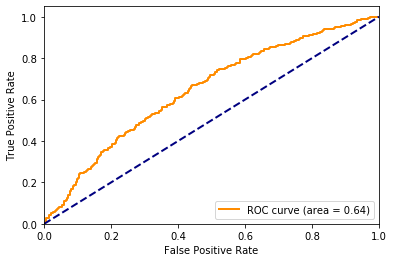

In [51]:
fpr, tpr, _ = roc_curve(df_dependent, model.predict())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC is only 0.64 which is not very bad, bu the model still does not fit the data very well

### Residuals

##### Hypothesis:

H1: The distribution of residuals is different from the normal distribution

H0: The distribution of residuals is not different from the normal distribution

p-value = 0.05

In [52]:
p = stats.kstest(model.resid_generalized, 'norm', args=(model.resid_generalized.mean(), model.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

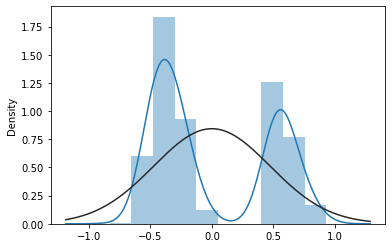

In [53]:
sns.distplot(model.resid_generalized, fit=stats.norm) 

##### Conclusion:

H1 is accepted at p-value = 0.05 : residuals significantly differ from the normal distribution.

### Multicollinearity

Multicollinearity can be checked to find any strong correlations between predictors

In [54]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
8,1.014330,gender_Male
4,1.090373,reside
7,1.348241,retire_Yes
5,1.361204,region_Zone 2
6,1.366961,region_Zone 3
0,1.462286,tenure
3,1.492570,income
1,2.295476,age
2,2.446682,employ


A problem of multicollinearity does not exist in the model

## Final Conclusions:

The model is not that bad since its accuracy is above 0.5, but it only describes 4% of variance of variable 'equip', which is not enough for the model to fit the data well. Residuals are not normally distributed - probably, it is due to the fact that quantity of FP is significantly greater than quantity of FN. The problem of multicollinearity does not exist in the model. Overall, the model can probably be used as a very rough estimation, but it is better to perform a futher analysis to determine variables that really influence the 'equip' variable, since currently only 2 out of 8 variables are statistically significant in the model.

# Task 2 - Panel Data

In [56]:
df = pd.read_excel("SMEs.xls")
year = pd.Categorical(df.year)
df = df.set_index(["id", "year"])
df["year"] = year
df

Region      District  Rabotniki  SubMSP  Vnovsozd  \
id year                                                                        
1  2016                    Moscow       Central    2608366  731632    150349   
   2017                    Moscow       Central    2199321  768618    159342   
   2018                    Moscow       Central    2200603  780902    150734   
2  2016          Saint Petersburg  Northwestern    1151893  334994     66107   
   2017          Saint Petersburg  Northwestern    1082580  347355     64414   
...                           ...           ...        ...     ...       ...   
84 2017             Tuva Republic      Siberian       8328    6845      1327   
   2018             Tuva Republic      Siberian       8788    6922      1485   
85 2016  Jewish Autonomous Oblast   Far Eastern      12163    4322       606   
   2017  Jewish Autonomous Oblast   Far Eastern      12882    4203       547   
   2018  Jewish Autonomous Oblast   Far Eastern      11910    4156       595   

               oborot      InvestFC       fedsub    minekfed  minekreg  ...  \
id year                                                                 ...   
1  2016  1.686972e+13  1.883730e+11  705299000.0  705.000000       176  ...   
   2017  1.499113e+13  3.439057e+11  555608500.0    0.000000         0  ...   
   2018  1.467666e+13  1.467666e+13  481000000.0  396.067416        96  ...   
2  2016  5.854914e+12  2.343767e+10   96443000.0   96.000000        24  ...   
   2017  4.396981e+12  3.118336e+10   59893240.0   60.000000       140  ...   
...               ...           ...          ...         ...       ...  ...   
84 2017  1.103968e+10 -2.698255e+08   23433290.0   23.000000         1  ...   
   2018  1.422781e+10  1.422781e+10   26983600.0   25.280899         1  ...   
85 2016  2.527910e+10  3.717700e+08    7349000.0    7.000000         0  ...   
   2017  2.104477e+10  3.070902e+08    4326608.0    4.000000         1  ...   
   2018  2.199281e+10  2.199281e+10    9260000.0    6.179775         1  ...   

         naselenie  edu30    biznav           im   infrmoney  infrrazv  \
id year                                                                  
1  2016   12355400      0   6766.08   104.000000  705.000000      23.0   
   2017   12380700      0   7048.00   114.000000    0.000000      26.0   
   2018   12506468      0  25400.00   152.000000  362.164356      28.6   
2  2016    5253600    100   1585.92  2504.000000  121.000000       9.0   
   2017    5281600    122   1652.00  2775.000000  200.000000      10.0   
...            ...    ...       ...          ...         ...       ...   
84 2017     318600    172      8.00    74.000000   10.000000       4.0   
   2018     321722    251   1208.00   113.333333    5.650791       4.4   
85 2016     165200      0      7.68   290.000000    0.000000       4.0   
   2017     164200    158      8.00   415.000000    4.000000       4.0   
   2018     162014    232    132.00   616.000000    2.054833       4.4   

         suppmsp           vrp          budg  year  
id year                                             
1  2016      425  1.429980e+07  1.852642e+06  2016  
   2017    11401  1.590428e+07  2.000854e+06  2017  
   2018    13111  1.780433e+07  2.134911e+06  2018  
2  2016     3834  3.742182e+06  4.766638e+05  2016  
   2017     7384  4.162067e+06  5.147969e+05  2017  
...          ...           ...           ...   ...  
84 2017     1490  5.808069e+04  2.463497e+04  2017  
   2018     1714  6.501945e+04  2.628552e+04  2018  
85 2016       68  4.687220e+04  9.741238e+03  2016  
   2017     1316  5.213140e+04  1.052054e+04  2017  
   2018     1513  5.835942e+04  1.122541e+04  2018  

[255 rows x 24 columns]

In [58]:
df.corrwith(df['oborot']).sort_values(ascending=False)

oborot           1.000000
budg             0.973670
Vnovsozd         0.963431
Rabotniki        0.955289
vrp              0.954838
saldfinresult    0.944306
SubMSP           0.936859
naselenie        0.848403
fz22344          0.790586
fedsub           0.602555
InvestFC         0.536792
biznav           0.484271
infrmoney        0.437321
minekfed         0.414470
minekreg         0.343297
newrabmesta      0.326501
suppmsp          0.245514
infrrazv         0.181681
im               0.114976
newSMBdo30      -0.020644
edu30           -0.037446
dtype: float64

### Chosen variables:

Dependent:
- oborot

Predictors (tried to choose predictors with not very high correlation with each other, besides first 3 correlated with oborot):
- budg
- Vnovsozd
- Rabotniki
- InvestFC
- fedsub
- biznav

In [89]:
chosen_df = df[['oborot','budg','Vnovsozd','Rabotniki','InvestFC','fedsub','biznav','year']]
chosen_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 255 entries, (1, 2016) to (85, 2018)
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   oborot     255 non-null    float64 
 1   budg       255 non-null    float64 
 2   Vnovsozd   255 non-null    int64   
 3   Rabotniki  255 non-null    int64   
 4   InvestFC   255 non-null    float64 
 5   fedsub     253 non-null    float64 
 6   biznav     255 non-null    float64 
 7   year       255 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 17.8 KB


In [92]:
chosen_df["fedsub"] = chosen_df["fedsub"].fillna(chosen_df["fedsub"].median())

<ipython-input-92-27a8abb75e81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_df["fedsub"] = chosen_df["fedsub"].fillna(chosen_df["fedsub"].median())


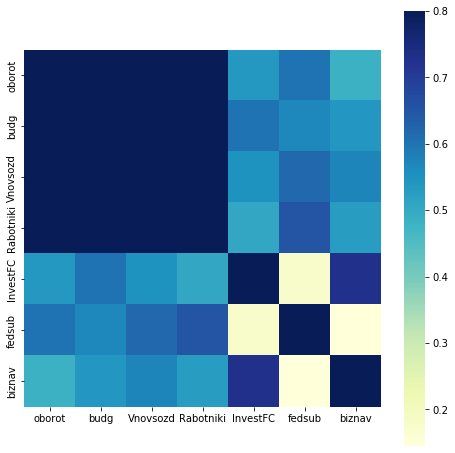

In [95]:
corr = chosen_df.corr('pearson')
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, square=True, cmap='YlGnBu')
plt.show()

### Dependent variable

##### Hypothesis:

H1: The distribution of the variable 'oborot' is different from the normal distribution

H0: The distribution of the variable 'oborot' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

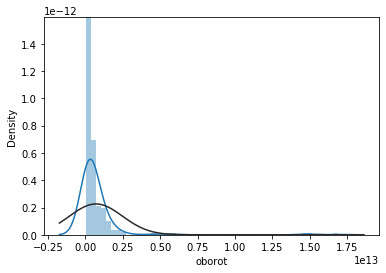

In [96]:
sns.distplot(chosen_df['oborot'], fit=stats.norm)

In [97]:
stats.kstest(chosen_df['oborot'], 'norm', args=(chosen_df['oborot'].mean(), chosen_df['oborot'].std()))

KstestResult(statistic=0.3469334328552291, pvalue=6.302033135999761e-28)

In [98]:
print('Skewness: {:.4f}'.format(chosen_df['oborot'].skew()))
print('Kurtosis: {:.4f}'.format(chosen_df['oborot'].kurt()))
print('Quartile Deviation: {:.4f}'.format((chosen_df['oborot'].quantile(0.75) - chosen_df['oborot'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(chosen_df['oborot'].quantile(0.9)/chosen_df['oborot'].quantile(0.1)))

Skewness: 7.3057
Kurtosis: 58.7992
Quartile Deviation: 220266640068.2000
Decile Ratio: 20.3191


##### Conclusion:

The dependent variable 'oborot' deviates from the normal distribution (H1 is accepted at p-value = 0.05). It is highly skewed and can be characterised as leptokurtic. Quartile deviation is very high, decile ratio is quite large as well

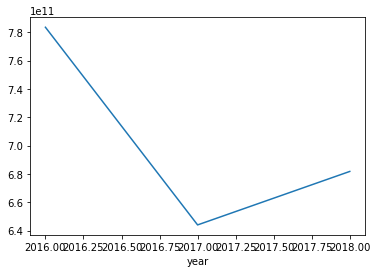

In [99]:
chosen_df['oborot'].groupby('year').mean().plot()

In general, by these 3 years it is difficult to say something about trend, but, in general, oborot decreases with years.

### Independent variables

##### Hypothesis:

H1: The distribution of the variable 'budg' is different from the normal distribution

H0: The distribution of the variable 'budg' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.3278401895002411, pvalue=6.540393997413027e-25)

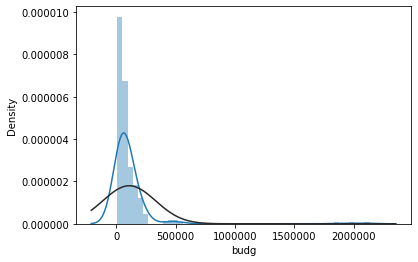

In [100]:
sns.distplot(chosen_df['budg'], fit=stats.norm)
stats.kstest(chosen_df['budg'], 'norm', args=(chosen_df['budg'].mean(), chosen_df['budg'].std()))

H1 is accepted at p-value = 0.05, budg deviates from normal distribution

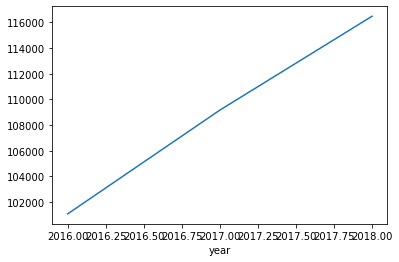

In [101]:
chosen_df['budg'].groupby('year').mean().plot()

There is a linear relationship between a budget and year

##### Hypothesis:

H1: The distribution of the variable 'Vnovsozd' is different from the normal distribution

H0: The distribution of the variable 'Vnovsozd' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.27553422162617147, pvalue=1.3290473807306439e-17)

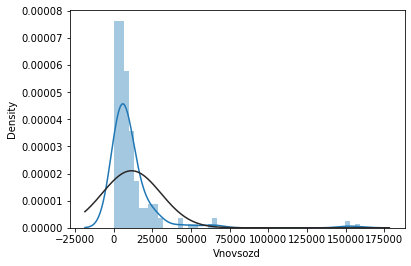

In [102]:
sns.distplot(chosen_df['Vnovsozd'], fit=stats.norm)
stats.kstest(chosen_df['Vnovsozd'], 'norm', args=(chosen_df['Vnovsozd'].mean(), chosen_df['Vnovsozd'].std()))

H1 is accepted at p-value = 0.05, Vnovsozd deviates from normal distribution

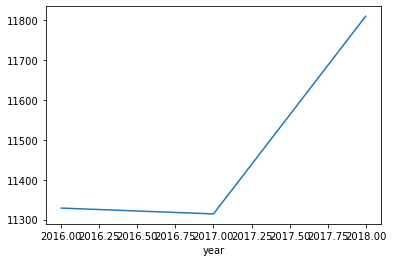

In [103]:
chosen_df['Vnovsozd'].groupby('year').mean().plot()

In general, by these 3 years it is difficult to say something about trend, but, in general, Vnovsozd increases with years.

##### Hypothesis:

H1: The distribution of the variable 'Rabotniki' is different from the normal distribution

H0: The distribution of the variable 'Rabotniki' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.2574491743007571, pvalue=2.1559405509855417e-15)

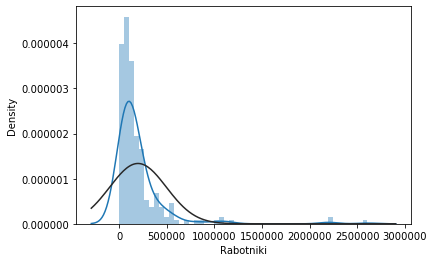

In [104]:
sns.distplot(chosen_df['Rabotniki'], fit=stats.norm)
stats.kstest(chosen_df['Rabotniki'], 'norm', args=(chosen_df['Rabotniki'].mean(), chosen_df['Rabotniki'].std()))

H1 is accepted at p-value = 0.05, Rabotniki deviates from normal distribution

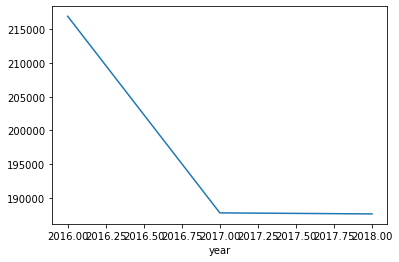

In [105]:
chosen_df['Rabotniki'].groupby('year').mean().plot()

In general, by these 3 years it is difficult to say something about trend, but, in general, Rabotniki decreases with years.

##### Hypothesis:

H1: The distribution of the variable 'InvestFC' is different from the normal distribution

H0: The distribution of the variable 'InvestFC' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.40557657290177224, pvalue=2.0653990397839038e-38)

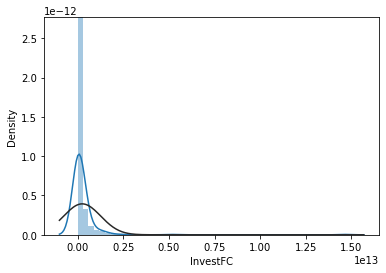

In [106]:
sns.distplot(chosen_df['InvestFC'], fit=stats.norm)
stats.kstest(chosen_df['InvestFC'], 'norm', args=(chosen_df['InvestFC'].mean(), chosen_df['InvestFC'].std()))

H1 is accepted at p-value = 0.05, InvestFC deviates from normal distribution

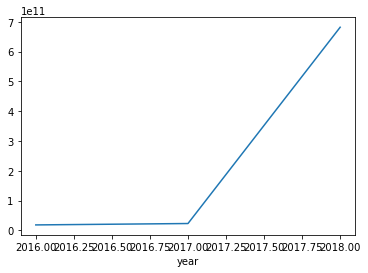

In [107]:
chosen_df['InvestFC'].groupby('year').mean().plot()

In general, by these 3 years it is difficult to say something about trend, but, in general, InvestFC increases with years.

##### Hypothesis:

H1: The distribution of the variable 'fedsub' is different from the normal distribution

H0: The distribution of the variable 'fedsub' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.20743716654700717, pvalue=4.2135103918314946e-10)

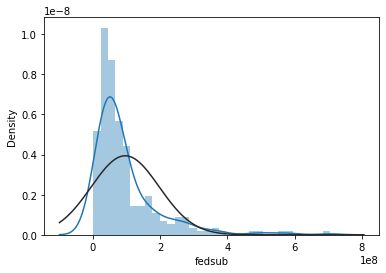

In [108]:
sns.distplot(chosen_df['fedsub'], fit=stats.norm)
stats.kstest(chosen_df['fedsub'], 'norm', args=(chosen_df['fedsub'].mean(), chosen_df['fedsub'].std()))

H1 is accepted at p-value = 0.05, fedsub deviates from normal distribution

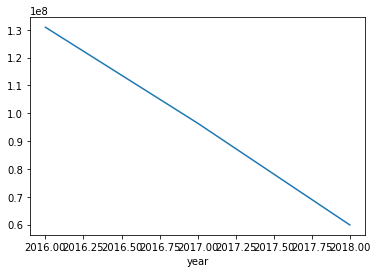

In [109]:
chosen_df['fedsub'].groupby('year').mean().plot()

Fedsub decreases each year (linear relationship)

##### Hypothesis:

H1: The distribution of the variable 'biznav' is different from the normal distribution

H0: The distribution of the variable 'biznav' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

KstestResult(statistic=0.3077662860367699, pvalue=6.075199847625587e-22)

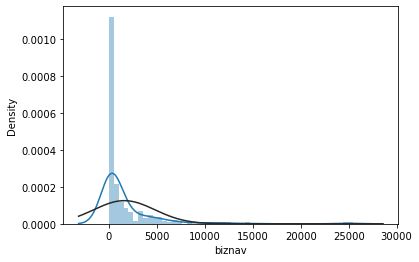

In [110]:
sns.distplot(chosen_df['biznav'], fit=stats.norm)
stats.kstest(chosen_df['biznav'], 'norm', args=(chosen_df['biznav'].mean(), chosen_df['biznav'].std()))

H1 is accepted at p-value = 0.05, biznav deviates from normal distribution

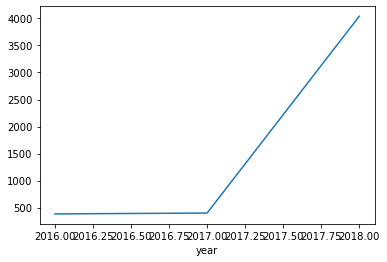

In [111]:
chosen_df['biznav'].groupby('year').mean().plot()

In general, by these 3 years it is difficult to say something about trend, but, in general, biznav increases with years.

## Regression Model

- H0_1: The variable budg is statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H0_2: The variable Vnovsozd is statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H0_3: The variable Rabotniki is statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H0_4: The variable InvestFC is statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H0_5: The variable fedsub is statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H0_6: The variable biznav is statistically significant for the panel data model constructed for a dependent variable 'oborot'

- H1_1: The variable budg is not statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H2_2: The variable Vnovsozd is not statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H3_3: The variable Rabotniki is not statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H4_4: The variable InvestFC is not statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H5_5: The variable fedsub is not statistically significant for the panel data model constructed for a dependent variable 'oborot'
- H6_6: The variable biznav is not statistically significant for the panel data model constructed for a dependent variable 'oborot'

### Pooled Model

In [125]:
exog_vars = ['budg','Vnovsozd','Rabotniki','InvestFC','fedsub','biznav','year']
exog = sm.add_constant(chosen_df[exog_vars])
mod = PooledOLS(chosen_df.oborot, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 oborot   R-squared:                        0.9760
Estimator:                  PooledOLS   R-squared (Between):              0.9825
No. Observations:                 255   R-squared (Within):              -0.0335
Date:                Sat, May 28 2022   R-squared (Overall):              0.9760
Time:                        14:38:18   Log-likelihood                   -7076.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1251.0
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(8,246)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1251.0
                            

### Fixed effect model

In [132]:
exog_vars = ['budg','Vnovsozd','Rabotniki','InvestFC','fedsub','biznav','year']
exog = sm.add_constant(chosen_df[exog_vars])
mod = PanelOLS(chosen_df.oborot, exog, entity_effects=True, drop_absorbed=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 oborot   R-squared:                        0.2451
Estimator:                   PanelOLS   R-squared (Between):             -0.0055
No. Observations:                 255   R-squared (Within):               0.2451
Date:                Sat, May 28 2022   R-squared (Overall):             -0.0039
Time:                        14:47:16   Log-likelihood                   -6871.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      27.279
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(2,168)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             27.279
                            

<ipython-input-132-a6c7902364fc>:4: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

budg, Vnovsozd, Rabotniki, biznav, year.2017, year.2018

  fe_res = mod.fit()


### Random effect model

In [127]:
mod = RandomEffects(chosen_df.oborot, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 oborot   R-squared:                        0.9760
Estimator:              RandomEffects   R-squared (Between):              0.9825
No. Observations:                 255   R-squared (Within):              -0.0335
Date:                Sat, May 28 2022   R-squared (Overall):              0.9760
Time:                        14:38:26   Log-likelihood                   -7076.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1251.0
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(8,246)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1251.0
                            

## Selection of a Panel Data Model

#### Hypotheses:

H0: no individual effects in the dataset

H1: there exist some individual effects in the dataset

In [128]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res.resids
pooled_OLS_dataset = pd.concat([chosen_df, residuals_pooled_OLS], axis=1)
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 7.701162348910234e-30


#### Conclusion:

H1 is accepted => there are individual effects => we should select a model with effects (fixed or random).

#### Hypotheses:

H0: individual effects and regressors are not correlated (they are random)

H1: there is a correlation between individual effects and regressors

In [118]:
import numpy.linalg as la
from scipy import stats
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('p-value: ' + str(hausman_results[2]))

p-value: nan


Unfortunately, the test does not return the proper result. Probably, it is due to the fact, that most variables were absorbed in Fixed effect model

Due to this result, the choice of the model is based on the R-squared of the models. According to the summaries presented above, Random effects model is the best one since R-squared total and between are higher than 0.95

## Model description

In [129]:
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 oborot   R-squared:                        0.9760
Estimator:              RandomEffects   R-squared (Between):              0.9825
No. Observations:                 255   R-squared (Within):              -0.0335
Date:                Sat, May 28 2022   R-squared (Overall):              0.9760
Time:                        14:38:26   Log-likelihood                   -7076.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1251.0
Entities:                          85   P-value                           0.0000
Avg Obs:                       3.0000   Distribution:                   F(8,246)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1251.0
                            

The model is statistically significant according to P-value of the model.

Statistically significant dependent variables are the following (at p-value = 0.05):
    
- budg
- Rabotniki
- biznav
- year (2017)

Therefore, H1_1, H1_3 and H1_6 are rejected, H1_2, H1_4 and H1_5 are accepted.

General R-squared is 0.98 meaning that the model describes 98% dispersion of the dependent variable. 

R-squared (Between) is 0.98 meaning that the model describes 98% variation between units of analysis.

R-squared (Within) is negative meaning that the model describes variation in the dependent variable within units of analysis worse than the model that could randomly predict the dependent variable.

In [133]:
coefs = pd.DataFrame()
coefs['Coefs'] = re_res.params[1:]
coefs['Features'] = re_res.params.index[1:]
coefs.set_index('Features', inplace=True)
coefs

,Coefs
Features,
budg,4.938072e+06
Vnovsozd,9.076994e+06
Rabotniki,2.152685e+06
InvestFC,1.133232e-02
fedsub,-4.363366e+02
biznav,-6.884512e+07
year.2017,-1.306402e+11
year.2018,9.424323e+10


- Let's consider the coefficient on the variable budg (Budget of the federal subject). The regression coefficient for the variable is positive and equals 4938072. It can be concluded that an increase in Budget of the federal subject by million rubles, on average, leads to an increase in oborot by 4938072 rubles.

- Let's consider the coefficient on the variable Rabotniki (Number of employees in Small and Medium Enterprises (SMEs)). The regression coefficient for this variable is 2152685. It can be concluded that an increase in number of employees in Small and Medium Enterprises, on average, leads to an increase in Oborot by 2152685 rubles.

- Let's consider the coefficient on the variable biznav (Number of SMEs registered on the SME Business Navigator Portal and supported using the SME Business Navigator services). The regression coefficient for the variable is negative and equals -68845120. It can be concluded that an increase in Number of SMEs registered on the SME Business Navigator Portal by one, on average, leads to a decrease in oborot by 68845120 rubles.

As for the years:
- In comparison to 2016, the oborot in 2017 is, on average, lower by -130640200000 rubles.

All the other predictors are not statistically significant

## Final conclusions

According to the chosen dependent variable and predictor, the most promising model appears to be random-effect model: firstly, Breusch–Pagan test shows that there are individual effects, and, secondly, there appear problems with fixed effects model, because of which hausman test failed. According to R-squareds, a model with random effects outperforms the model with fixed effects and, this, it has been chosen. The model has quite high R-squared but only between units of analysis. Result model describes variation in the dependent variable within units of analysis worse than the model that could randomly predict the dependent variable. All in all, the model can be used, but it is better to try using other predictors as well since some of the chosen predictors appeared to be not significant.

# Task 4

Time-series data stores information about one object at different time fragments (snapshots). Information is stored in the time order, while time intervals are usually presumed to be equal between rows in data. Examples of such data may include exchange rates, prices on shares, COVID illnesses/deaths, war deaths, etc. Analysis of time-series data mainly focuses on finding trends, cycles, seasonalities in data and making corresponding predictions about the future state of the research object.
Time series may contain the following components:
- trends
- seasonality
- cycles
- unexplained variation.

Depending on number of variables varying over time, the time-series can be called either as univariate (only 1 var) or as multivariate (> 1 var).

Time-series data can be either stationary or not - it represents how a variable changes over time, and if variable values are rather stable on the long-distance and properties do not depend on the time, the data can be called stationary. Stationarity influences the choice of the model used to analyse the time-series data.

Examples of time-series data:
- Exchange rates,
- Market price on securities/shares,
- COVID illnesses / deaths / recoveries
- Deaths / prisoners on wars

Hereafter I would describe an example of a time-series dataset related to deaths of Russian militaries on Ukrainian war. Such time-series may be simply two-column: day and number of deaths. Number of deaths can be accumulated (including deaths at previous days) or may represent deaths specificly at the current date.

Some research problems:
- To determine the long-term trends in daily deaths of Russian army. Sample hypothesis: there is a decreasing trend in number of daily deaths of russian army.
- To determine relationships between days of the week and daily deaths. Sample hypothesis: daily deaths of russian army in Mondays are, on average, higher than number of deaths at other week days (Monday is a hard day).
- To determine bursts of deaths during major military operations. Sample hypothesis: there are cycles in number of daily deaths of russian army associated with dates when major military operations were performed.

Problems:
- Non-existent data for some dates (null-values): requires filling empty cells using some techniques such as interpolating, forward-fills and backward-fills. Inappropriate choice of an approach to fill empty data can hide some seasonalities or cycles in the data.
- People are sometimes lazy, and may put information about deaths/illnesses for a whole week, for instance, instead of for each day. Or, if we talk about Ukrainian war info, there was a problem that some days no info was declared about daily deaths, and on the next day after such days all these deaths were added to this next day but not to all these dates, which is misleading. Such problems require huge preprocessing and filtering to start time-series analysis.
- Stationarity - it is important. If the analysis for the stationarity is not performed, the whole time-series analysis may appear to be wrong. For instance, ARIMA without predefined d = 0 for the stationary data would have very poor predictions (for some reason, it may not understand that the data is stationary). Obviously, the usage of ARMA on not stationary data would also lead to huge problems.

# Task 3

In multinomial regression, the dependent variable is categorical but not ordinal.

Let us make the following example:

To make HRs effective, analysts decide to make a model that can predict the appropriate IT-profession for a person (tester, developer, product manager, etc.). For these purposes, data from resumes can be preprocessed and analyzed. Y is known as a person has chosen a vacancy he/she is finding. Predictor variables are all in the resume.

Purpose of the study: understand, is there a relationship between information presented in the resume and the chosen IT-profession. This data can later be used to make proposals of jobs to applicants, while the proposed jobs can differ from a chosen by a person job since the model can potentially predict a better choice.

Research hypotheses:
- There is a relationship between age and choice of IT-profession.
- There is a relationship between gender and choice of IT-profession.
- There is a relationship between work experience and choice of IT-profession.
- There is a relationship between education and choice of IT-profession.

Or, more narrow:

- People with Higher education more often choose developer profession in comparison to people with secondary education.
- Females more often choose analysts jobs than males.
- People with age > 40 with a greater chance choose a tester job than people <= 40 years old.

Dependent variable: IT-profession.

Some values:
- Analyst,
- Developer (may be divided into frontend, backend),
- Tester,
- Devops,
- Product Manager,
- Program Manager,
- Team Lead

Predictors:
- Age
- Gender
- Level of education
- Work experience
- Last profession (if it is possible)
- City/Country
- Existence of photo
- Languages known (can be transformed to dummy vars)
- Desired salary

Some skills that can be presented in resume, may also be reflected in predictors but a future research is needed.

Indicators that has to be calculated:

- LLR p-value (for model to be significant, has to be < 0.05)
- Pseudo R-squ. (for an excellent model, has to be close to 1)
- Accuracy (for an excellent model, has to be close to 1)
- Log-likelihood can also be calculated but has to be measured with other models.
- p-values for all predictors must be < 0.05.

Some of them can also be used for diagnosis (such as accuracy). We can also present a confusion matrix and in ideal situation there should be no falses.

For diagnosis we can also check existence of multicollinearity (for each predictor has to be < 10). Residuals may be calculated as well - in excellent situation, they has to be normally distributed (if they exist).